**Nguyễn Tiến Dũng**

20170062

KSTN Toán Tin - K62

*Đại học Bách khoa Hà Nội*

**Câu 1:**

***a.*** Xích trên là tối giản do đồ thị biểu diễn là đồ thị liên thông có hướng

***b.*** Xích Markov tối giản và đóng, do đó các trạng thái $i$ là hồi quy dương

***c.*** Do các trạng thái $i$ là hồi quy dương nên tồn thời gian trung bình xích trở lại trạng thái $i$ là $m_i$ được xác định như sau
$$
m_i = \frac{1}{\pi_i}
$$
trong đó $$\pi_i = \underset{n \to \infty}{lim}p_{ji}^{(n)}$$

Ta có $\pi$ là phân phối dừng được xác định như sau
$$
\pi = (0.46, 0.38, 0.16)
$$
Dẫn đến $$m = (m_0, m_1, m_2) = (2.17, 2.6, 6.5)$$

In [1]:
import processviz as pvz

---

**Câu 2:**

Phân lớp các trạng thái như sau $\{0, 1, 2, 3, 4\}$

***a.*** Phân phối dừng $\pi$ của xích được xác định bởi phương trình
$$
\pi.P = \pi
$$
Giải hệ trên ta thu được $\pi = (0.133, 0.2       , 0.267, 0.267, 0.133)$

***b.*** Xích Markov trên là liên tối giản và đóng, do đó tồn tại phân phối giới hạn và của xích. 

Thấy rằng ma trận trên là chính quy, do đó phân phối dừng là phân phối giới hạn và đồng thời cũng là phân phối Ergodic, do đó ta có phân phối $\pi = (0.133, 0.2       , 0.267, 0.267, 0.133)$

Chứng tỏ $\underset{n \to \infty}{lim}p_{i2}^{(n)} = \pi_2 = 0.2$


In [28]:
G2 = pvz.MarkovChain()
G2.from_file('./assignment/assignment_6/input_1.csv')
G2.get_communicating_class()

[['0', '1', '2', '3', '4']]

In [29]:
for i in G2.state:
    print(G2.is_recurrent(i))

True
True
True
True
True


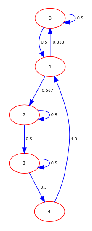

In [30]:
G2.generate_graph()

In [31]:
G2.get_steady_state()

array([0.13333333, 0.2       , 0.26666667, 0.26666667, 0.13333333])

---



**Câu 3:**

Phân lớp các trạng thái như sau
$$
\begin{cases}E_0 = \{0\} \\E_1 = \{2,3,4,5\}\end{cases}
$$
***a.***

Ta thấy $E_1$ đóng và tối giản, do đó các trạng thái $2, 3, 4, 5$ là hồi quy

Các trạng thái còn lại là trạng thái chuyển

Chu kì:

- $0$: 1
- $2,3,4,5$: 1
- $1$: 0

***b.*** Xét riêng $E_1$. Thấy rằng $E_1$ đóng, do đó bản thân $E_1$ làm một xích Markov

$E_1$ tối giản và có chu kì 1, điều đó dẫn đến $E_1$ là một xích chính quy, do đó tồn tại phân phối giới hạn chính là phân phối dừng $\pi$ được xác định qua hệ phương trình $\pi.P_{E_1} = \pi$

Ta có $\pi = (0.125,0.25,0.25,0.375)$

Suy ra $\underset{n \to \infty}{lim}p_{i5}^{(n)} = \pi_i, i \in \{2,3,4,5\}$

Từ trạng thái $1$, theo phương trình CK, ta có
$$
P_{15}^{(n)} = \sum_{r \in I}P_{1r}P_{r5}^{n-1} = P_{14}P_{45}^{(n-1)}
$$
Cho $n \to \infty$, ta có $p_{15}^{(n)} = P_{45}^{(n)} = 0.25$

Từ trạng thái $0$, theo CK, ta có:
$$
P_{05}^{(n+1)} = \sum_{r \in I}P_{0r}P_{r5}^{n} = P_{00}P_{05}^{(n)} + P_{04}P_{45}^{(n)}
$$
Cho $n \to \infty$, ta có
$$
p = 0.5p + 0.5*0.375 \Rightarrow p = 0.375
$$
Vậy $\underset{n \to \infty}{P_{05}^{(n)}} = 0.375$



In [34]:
G3 = pvz.MarkovChain()
G3.from_file('./assignment/assignment_6/input_2.csv')
G3.get_communicating_class()

[['0'], ['2', '3', '4', '5']]

In [35]:
for i in G3.state:
    print(G3.get_period(i))

1
0
1
1
1
1


In [55]:
G3.matrix_at(1)

array([[0.5  , 0.   , 0.   , 0.   , 0.5  , 0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 1.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 1.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 1.   ],
       [0.   , 0.   , 0.333, 0.333, 0.   , 0.333]])

---

**Câu 4:**

Phân lớp trạng thái
$$
\begin{cases}E_{0} = \{0, 1\} \\E_{1} = \{2, 3\} \\E_{2} = \{4, 5\}\end{cases}
$$
Trong đó các lớp $E_0, E_1$ là các lớp tối giản và đóng

***a.***

Do $E_0, E_1$ là đóng và tối giản $\Rightarrow$ bản thân $E_0, E_1$ cũng là một xích Markov.

Do đó nên tồn tại phân phối giới hạn $\pi^0, \pi^1$

Trong đó $pi^0 = (0.6,0.4)$ và $\pi^1 = (0.6,0.4)$ 

Từ đây thấy rằng 
$$
\begin{cases}\underset{n \to \infty}{lim}P_{10}^{(n)} = 0.6 \\\underset{n \to \infty}{lim}P_{20}^{(n)} = \underset{n \to \infty}{lim}P_{30}^{(n)} = 0\end{cases}
$$
***b.*** Ta có
$$
\underset{n \to \infty}{lim}P_{34}^{(n)} = 0.4
$$
Theo phương trình CK, ta có:
$$
P_{45}^{(n+1)} = \sum_{r \in I}P_{4r}^{(n)}P_{r5} = P_{43}^{(n)}P_{35} + P_{45}^{(n)}P_{55} = 0.5*P_{45}^{(n)}
$$
Cho $n \to \infty$, ta thu được $\underset{n \to \infty}{lim}P_{45}^{(n)} = 0$

In [68]:
G4 = pvz.MarkovChain()
G4.from_file('./assignment/assignment_6/input_3.csv')
G4.get_communicating_class()

[['0', '1'], ['2', '3'], ['4', '5']]

In [69]:
G4.matrix_at(1000)

array([[0.6, 0.4, 0. , 0. , 0. , 0. ],
       [0.6, 0.4, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.6, 0.4, 0. , 0. ],
       [0. , 0. , 0.6, 0.4, 0. , 0. ],
       [0. , 0. , 0.6, 0.4, 0. , 0. ],
       [0. , 0. , 0.6, 0.4, 0. , 0. ]])